In [143]:
import numpy as np 
import pandas as pd 
import seaborn as sns

from subprocess import check_output

from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

Load the Data

In [144]:
vg_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
vg_cleaned = vg_df.dropna(axis=0, how='any')

vg_cleaned.loc[:,'User_Score'] = vg_cleaned.loc[:,'User_Score'].convert_objects(convert_numeric=True);

C:\Users\Marija\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.
C:\Users\Marija\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Correlation

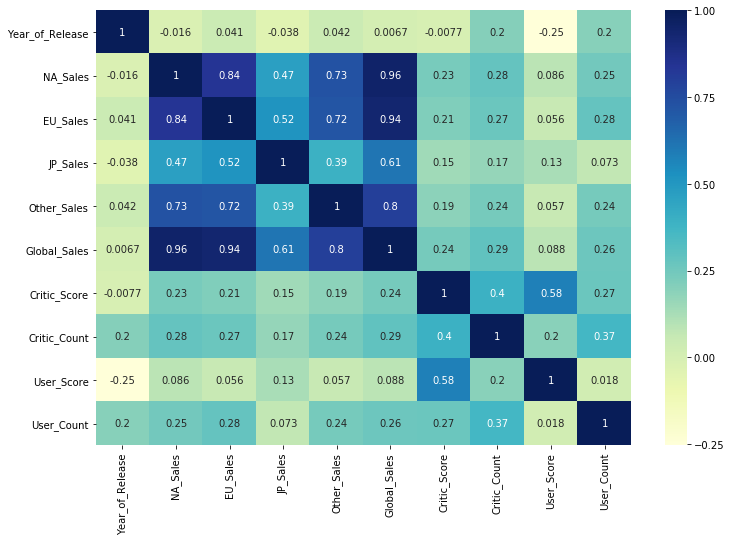

In [145]:
plt.figure(figsize=(12, 8))

vg_corr = vg_cleaned.corr();
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True,
           cmap="YlGnBu");
plt.figure(figsize=(12, 8))

This chart shows a heat map with the values of the coefficient of correlation between pairs of different attributes. From this chart it can be clearly seen that there is a strong positive correlation between sales in different regions of the world, that is, as the number of sales in one region grows, the number of sales in another region is growing as well. This is expected because a game that is popular in one part of the world is probably also popular in another because of the global market. One interesting fact that can be seen from this graph is that sales in Japan are the least correlated with sales in the rest of the world. This means that the Japanese market is different from the global market and those games, that are popular in Japan, are less popular in the rest of the world. Additionally, sales in different regions are strongly correlated with the global sales as expected, given that global sales represent the sum of individual sales per region. Again, sales in Japan are poorly correlated with global sales, which further confirms the previously stated hypothesis.

The graph also shows a positive correlation between the user score and the one from the critics, which means that critics and users to some extent agree in the evaluation of video games. 
Additionally, we may notice a weaker positive correlation between the number of ratings and the score both for critics and for users, which means that a greater number of ratings in general case also means a higher rating for the games. 

The strongest negative correlation is between the user score and the year of production. This means that newer games get worse ratings from users than older games. This is especially interesting given the fact that the year of production is almost uncorrelated with critics' score. One possible explanation of this trend is that users are nostalgic for older games and give them higher ratings. Another possible explanation is the saturation of the video games market and the non-inventiveness imposed by the race for faster production of video games at an almost annual level in the last 10 years.
In order to visualize some of these correlations, we will show a few scatter plots below.


Scatterplot between Global Sales and Regional Sales

The following chart shows scatter plots between sales in each of the different regions and global sales, and again, sales in Japan have the smallest correlation with global sales.

In [147]:
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
sales_normalised_df = vg_cleaned[sales_cols].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))

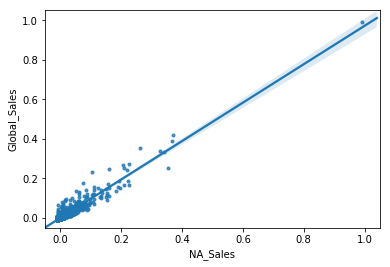

In [148]:
sns.regplot(x = sales_normalised_df.NA_Sales, y = sales_normalised_df.Global_Sales, marker=".")

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
fig.tight_layout();

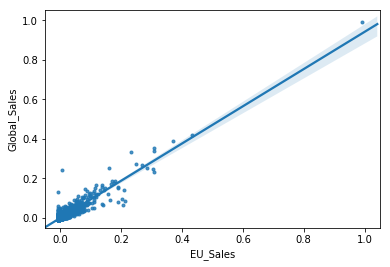

In [149]:
sns.regplot(x = sales_normalised_df.EU_Sales, y = sales_normalised_df.Global_Sales, marker=".")

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
fig.tight_layout();

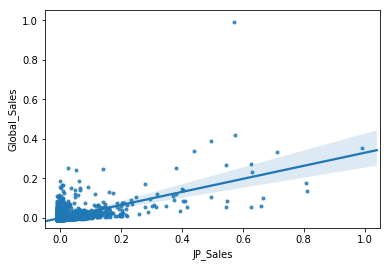

In [151]:
sns.regplot(x = sales_normalised_df.JP_Sales, y = sales_normalised_df.Global_Sales, marker=".")

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
fig.tight_layout();

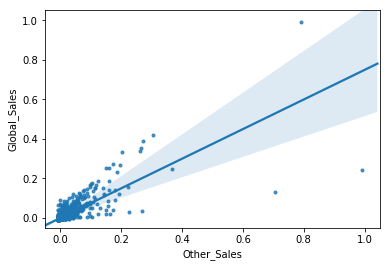

In [153]:
sns.regplot(x = sales_normalised_df.Other_Sales, y = sales_normalised_df.Global_Sales, marker=".")

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
fig.tight_layout();

Regional Sales of Genres

In [154]:
genre_geo_rankings = [vg_cleaned.groupby('Genre').sum().unstack().NA_Sales.sort_values(ascending=False).index, 
                      vg_cleaned.groupby('Genre').sum().unstack().EU_Sales.sort_values(ascending=False).index,
                      vg_cleaned.groupby('Genre').sum().unstack().Other_Sales.sort_values(ascending=False).index,
                      vg_cleaned.groupby('Genre').sum().unstack().JP_Sales.sort_values(ascending=False).index 
                      ]

In [155]:
# 1 - number of releases per genre
# 2 - sales per genre
# 3 - average sales per game per genre
genre_geo_rank_df = pd.DataFrame(columns=['genre', 'rank_type', 'rank'])

for region in range(4):
    for genre in range(len(genre_geo_rankings[region])):
        genre_geo_rank_df = genre_geo_rank_df.append({'genre':genre_geo_rankings[region][genre], 'rank_type': region, 'rank':genre},
                                   ignore_index=True)

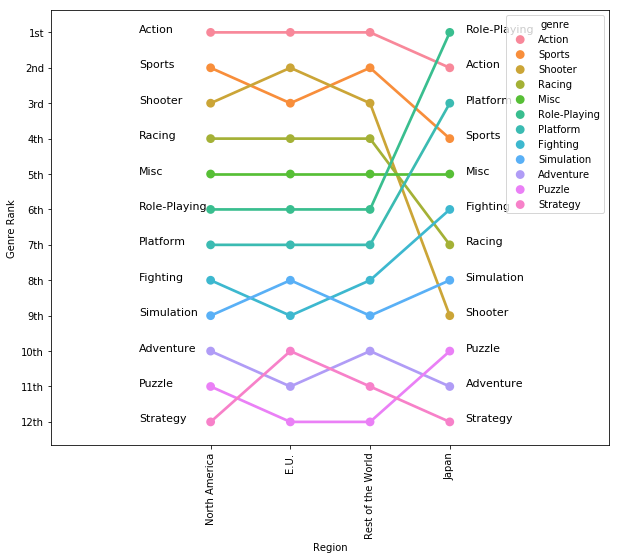

In [156]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

sns.pointplot(x=genre_geo_rank_df.rank_type,
              y=12-genre_geo_rank_df['rank'], 
              hue=genre_geo_rank_df.genre)

for i in range(len(genre_geo_rankings[0])):
    ax.text(-0.9, 12-i, genre_geo_rankings[0][i], fontsize=11)
    ax.text(3.2, 12-i, genre_geo_rankings[3][i], fontsize=11)
    
ax.set_xlim([-2,5])

xs = [0.0, 1.0, 2.0, 3.0]
x_labels = ['North America', 'E.U.', 'Rest of the World', 'Japan']
plt.xticks(xs, x_labels, rotation='vertical')
ax.set_xlabel('Region')

ys = range(1,13)
y_labels = ['12th', '11th', '10th', '9th', '8th', '7th', '6th', '5th', '4th', '3rd', '2nd', '1st']
plt.yticks(ys, y_labels)
ax.set_ylabel('Genre Rank')

plt.show();


The taste of gamers in Japan is really different than that of the three other regions. The remaining three regions are, more or less, similar.

Sales vs Number of Releases per Year

In [157]:
temp1 = vg_cleaned.groupby(['Year_of_Release']).count()
temp1 = temp1.reset_index()

In [158]:
temp2 = vg_cleaned.groupby(['Year_of_Release']).sum()
temp2 = temp2.reset_index()

In [159]:
normalised_df = pd.DataFrame()

normalised_df['release_count'] = temp1['Name']
normalised_df['global_sales'] = temp2['Global_Sales']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()
normalised_df['year'] = temp1['Year_of_Release']

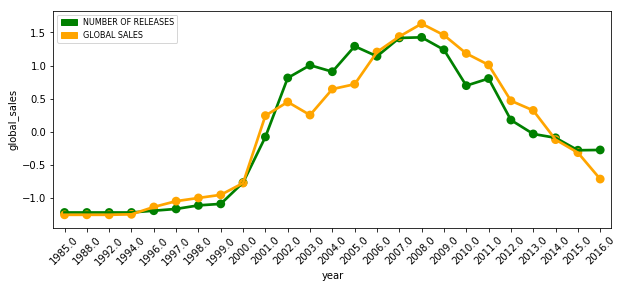

In [160]:
plt.figure(figsize=(10, 4))
ax = sns.pointplot(x = normalised_df.year, y = normalised_df.release_count, color = 'green', label='Release Count')
ax = sns.pointplot(x = normalised_df.year, y = normalised_df.global_sales, color = 'orange', label='Global Sales')

blue_patch = mpatches.Patch(color='green', label='NUMBER OF RELEASES')
red_patch = mpatches.Patch(color='orange', label='GLOBAL SALES')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 8)

plt.xticks(rotation=45);

The shapes follow each other well, there wasn't too much sales with little releases or vice versa. The other thing to note is that the number of releases is smoother than the sales, which seems harder to accurately predict the sales.

Genre Sales Evolution

The first plot is an area plot that shows the precentage of sales, for each genre, over the years. On the second plot are shown the sales by year, divided by genre.

In [161]:
fig = plt.figure(figsize=(10, 8))

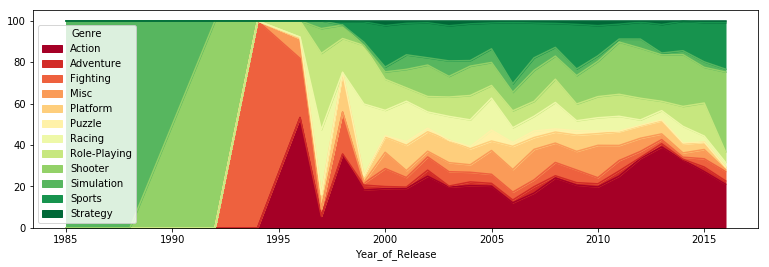

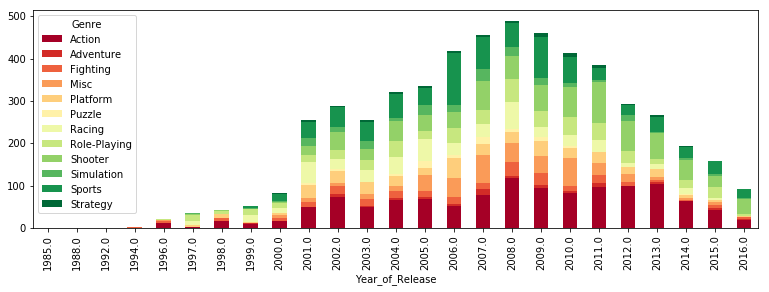

In [162]:
genre_sales_percentages_by_year = (vg_cleaned.groupby(['Year_of_Release', 'Genre']).Global_Sales.sum())*(100)/vg_cleaned.groupby(['Year_of_Release']).Global_Sales.sum()
genre_sales_percentages_by_year.unstack().plot(kind='area', stacked=True, colormap= 'RdYlGn', grid=False, figsize=(13, 4))

yearlySales = vg_cleaned.groupby(['Year_of_Release','Genre']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'RdYlGn', figsize=(13, 4) ) 

The "action" genre is clearly what gamers are interested to play the most, as we have already seen. The interesting trend about it is that when the games sales started their decline around 2009, the "action" level remained almost the same. This genre may seem not to be as affected from the market changes as the other genres.

Genre Total Sales

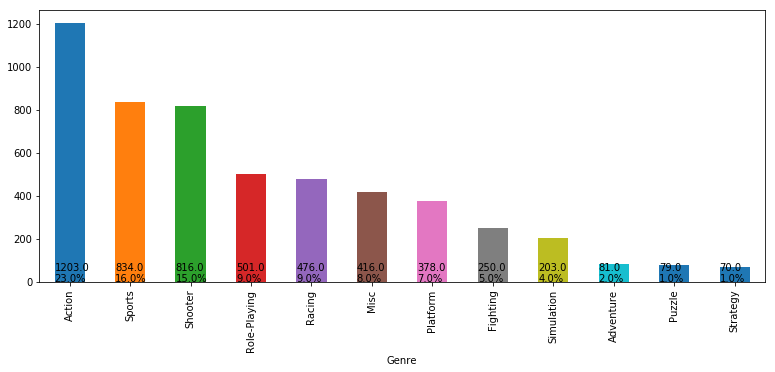

In [163]:
x = vg_cleaned.groupby(['Genre']).sum().copy()
ax = x.Global_Sales.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5));

for p in ax.patches:
    ax.annotate(str( round( p.get_height() ) ) + "\n" + str(round( p.get_height() / 53.23) )+ "%", 
                (p.get_x(), 0),
                color='black')

Genre Total Number of Releases

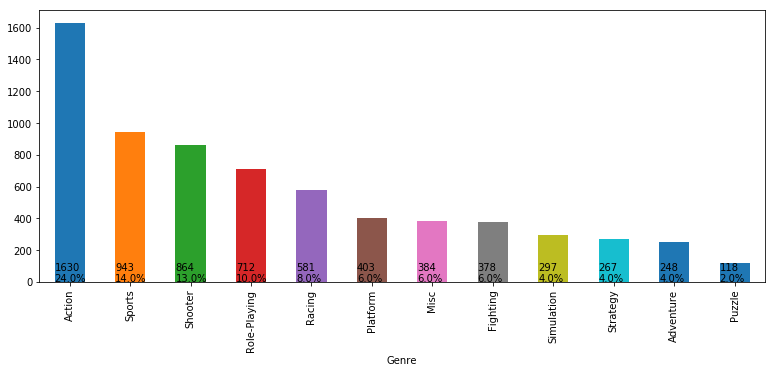

In [164]:
x1 = vg_cleaned.groupby(['Genre']).count()
ax1 = x1.Global_Sales.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5));

for p in ax1.patches:
    ax1.annotate(str( round( p.get_height() ) ) + "\n" + str(round( p.get_height() / 68.53) )+ "%", 
                (p.get_x(), 0),
                color='black')

The ranking of genres by total sales was: Action, Sports, Shooter, Role-Playing, Racing, Misc, Platform, Fighting, Simulation, Adventure, Puzzle, Strategy.

The ranking of genres by number of releases is: Action, Sports, Shooter, Role-Playing, Racing, Platform, Misc, Fighting, Simulation, Strategy, Adventure, Puzzle.

We can see that there are no drastic changes in the ranking. For example, genre Strategy is sold less than it is released.

These changes in ranking are interesting to explore more. We want to see how different genres perform accordingly to different metrics. The ones we chose are:
- Number of Releases per Genre
- Total Sales per Genre
- Average Sales per Game per Genre

In [165]:
genre_difference_metric = [vg_cleaned.Genre.value_counts().index, vg_cleaned.groupby(['Genre']).sum().Global_Sales.sort_values(ascending=False).index, vg_cleaned.groupby(['Genre']).mean().Global_Sales.sort_values(ascending=False).index]

genre_evolution_df = pd.DataFrame(columns=['genre', 'rank_type', 'rank'])

for metric in range(3):
    for genre in range(len(genre_difference_metric[metric])):
        genre_evolution_df = genre_evolution_df.append({'genre':genre_difference_metric[metric][genre], 'rank_type': metric, 'rank':genre},
                                   ignore_index=True)

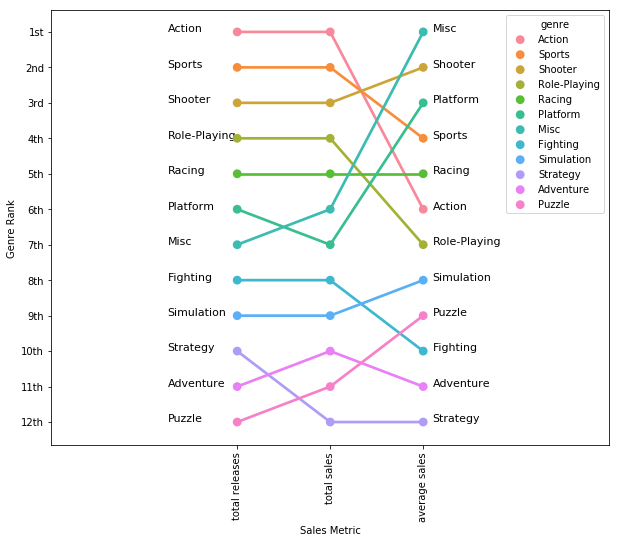

In [166]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

sns.pointplot(x=genre_evolution_df.rank_type,
              y=12-genre_evolution_df['rank'], 
              hue=genre_evolution_df.genre)

for i in range(len(genre_difference_metric[0])):
    ax.text(-0.75, 12-i, genre_difference_metric[0][i], fontsize=11)
    ax.text(2.1, 12-i, genre_difference_metric[2][i], fontsize=11)
    
ax.set_xlim([-2,4])

xs = [0.0, 1.0, 2.0]
x_labels = ['total releases', 'total sales', 'average sales']
plt.xticks(xs, x_labels, rotation='vertical')

ax.set_xlabel('Sales Metric')

ys = range(1,13)
y_labels = ['12th', '11th', '10th', '9th', '8th', '7th', '6th', '5th', '4th', '3rd', '2nd', '1st']
plt.yticks(ys, y_labels)
ax.set_ylabel('Genre Rank')

plt.show();


This is visualization of the changes in the ranking of genres, according to different metrics.